In [1]:
#Importing The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing our dataset
dataset=pd.read_csv("train.csv")
x=dataset.iloc[:,0].values
y=dataset.iloc[:,1:].values

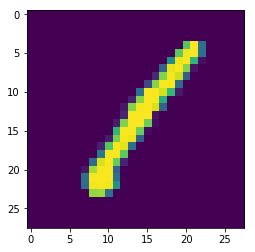

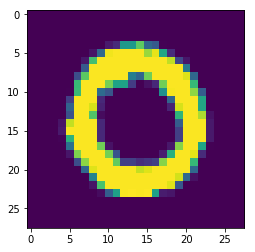

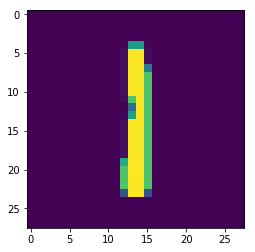

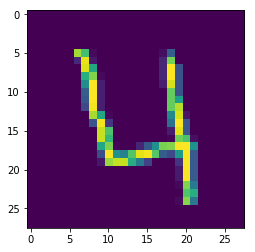

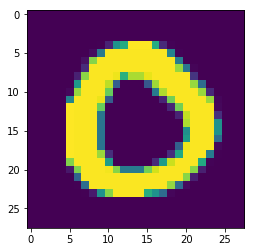

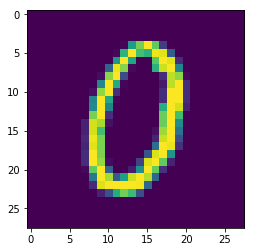

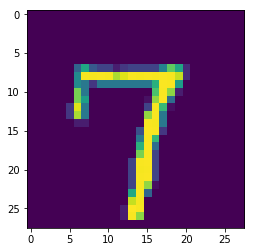

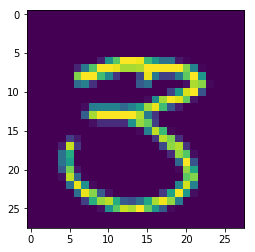

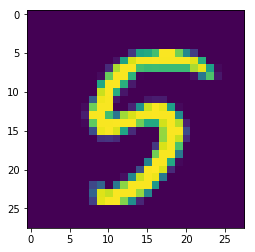

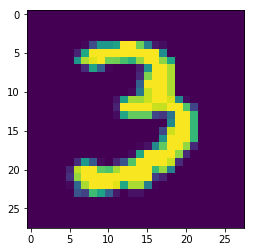

In [3]:
#Displaying Images
for i in range(10):
    plt.imshow(y[i].reshape((28,28)))
    plt.show()

In [5]:
#Applying Threshold Binary
import cv2
for i in range(y.shape[0]):
    image=np.array(y[i],dtype='float32')
    image=image.reshape((28,28))
    useless,image=cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    y[i]=image.reshape(-1)

In [ ]:
#Image Augmentation
for i in range(y.shape[0]):
    image=np.array(y[i],dtype='float32')
    image=image.reshape((28,28))
    
    i1 = np.float32([[1, 0, 7], [0, 1,7]])
    img1 = cv2.warpAffine(image, i1, (28, 28))
    img1=img1.reshape(-1)
    
    i2 = np.float32([[1, 0, -7], [0, 1,-7]])
    img2 = cv2.warpAffine(image, i2, (28, 28))
    img2=img2.reshape(-1)
    
    i3 = np.float32([[1, 0, 0], [0, 1,7]])
    img3 = cv2.warpAffine(image, i3, (28, 28))
    img3=img3.reshape(-1)
    
    i4 = np.float32([[1, 0, 7], [0, 1,0]])
    img4 = cv2.warpAffine(image, i4, (28, 28))
    img4=img4.reshape(-1)
    
    i5 = np.float32([[1, 0, 0], [0, 1,-7]])
    img5 = cv2.warpAffine(image, i5, (28, 28))
    img5=img5.reshape(-1)
    
    i6 = np.float32([[1, 0, -7], [0, 1,0]])
    img6 = cv2.warpAffine(image, i6, (28, 28))
    img6=img6.reshape(-1)
    
    i7 = np.float32([[1, 0, -7], [0, 1,7]])
    img7 = cv2.warpAffine(image, i7, (28, 28))
    img7=img7.reshape(-1)
    
    i8 = np.float32([[1, 0, 7], [0, 1,-7]])
    img8 = cv2.warpAffine(image, i8, (28, 28))
    img8=img8.reshape(-1)
    
    ir1=cv2.getRotationMatrix2D((14,14),-10,1)
    img9 = cv2.warpAffine(image,ir1,(28,28))
    img9=img9.reshape(-1)
    
    ir2=cv2.getRotationMatrix2D((14,14),10,1)
    img10 = cv2.warpAffine(image,ir2,(28,28))
    img10=img10.reshape(-1)
    
    ir3=cv2.getRotationMatrix2D((14,14),-20,1)
    img11 = cv2.warpAffine(image,ir3,(28,28))
    img11=img11.reshape(-1)
    
    ir4=cv2.getRotationMatrix2D((14,14),20,1)
    img12 = cv2.warpAffine(image,ir4,(28,28))
    img12=img12.reshape(-1)
    
    x = np.append(x,x[i])    
    y = np.vstack([y, img1])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img2])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img3])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img4])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img5])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img6])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img7])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img8])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img9])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img10])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img11])
    
    x = np.append(x,x[i])     
    y = np.vstack([y, img12])
    

In [ ]:
#Validating Our New Dataset
print(y.shape)
print(x.shape)

In [ ]:
#Importing Test data and applying same Pipeline on it.
test_data=pd.read_csv('test.csv')
#Applying Threshold Binary to Test Data
for i in range(test_data.shape[0]):
    image=np.array(test_data[i],dtype='float32')
    image=image.reshape((28,28))
    useless,image=cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    test_data[i]=image.reshape(-1)

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state =42)
classifier.fit(x,y)

# Predicting the Test set results
y_pred = classifier.predict(test_data)

In [ ]:
#Converting Results in CSV file
np.savetxt("submission.csv", y_pred, delimiter=",")

In [ ]:
# Thanks For Viewing

1